In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleandata.csv')

In [ ]:
df.head()

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,...,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation,do_children_3_and_17_yrs_receive_regular_school_meals
0,4570534489882624,3/17/2021,Female,>45,"Suburban,Peri-urban",food_regexpenses_nothingelse,Univ_college_degree_completed,Unemployed,Miranda,1,...,0,0,1,1,0,0,0,0,0,Yes
1,6440166989496320,3/29/2021,Male,26-35,"Suburban,Peri-urban",notenoughfood,Univ_college_degree_completed,Unemployed,Miranda,1,...,0,1,0,1,1,0,0,0,0,No
2,5001167808757760,3/18/2021,Female,26-35,"City,Metropolitian",food_clothes_furniture_savings,Univ_college_degree_completed,FullTime,Miranda,1,...,1,1,0,1,0,1,0,0,1,No
3,5524933164924928,3/24/2021,Male,36-45,"Suburban,Peri-urban",food_nothingelse,Univ_college_degree_completed,FullTime,Miranda,1,...,1,1,0,1,0,0,0,0,0,No
4,5032515751641088,3/18/2021,Female,>45,"Suburban,Peri-urban",food_regexpenses_nothingelse,Univ_college_degree_completed,Unemployed,Miranda,1,...,0,1,0,1,1,0,0,0,1,No


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
encoder = LabelEncoder()
df["submission_state"] = encoder.fit_transform(df["submission_state"])

In [ ]:
df = df.drop(['submission_date'],axis=1)

In [ ]:
#df = df.drop(['submission_state'],axis=1)

In [ ]:
df['gender']=df['gender'].map({'Female':1, 'Male':2, 'Prefer_not_to_say':0})
df['age']=df['age'].map({'>45':4, '26-35':2, '36-45':3,'16-25':1,'Prefer_not_to_say':0})
df['geography']=df['geography'].map({'Suburban,Peri-urban':1, 'City,Metropolitian':2, 'Rural':0})
df['financial_situation']=df['financial_situation'].map({'food_regexpenses_nothingelse':3,'food_clothes_furniture_nosavings':5,'food_clothes_furniture_savings':6,
       'notenoughfood':1,'food_regexpenses_clothes_nothingelse':4,'food_nothingelse':2,'Prefer not to answer':0})
df['education']=df['education'].map({'Univ_college_degree_completed':4,'diploma_degreecompleted':5,'secondary_highschool_completed':3,'Primary_school_completed':2,'Postgraduate':6,
       'Prefer_not_to_say':0, 'No_formal_education':1})
df['employment_status']=df['employment_status'].map({'Retired':5,'Housework':6,'PartTime':3, 'FullTime':4, 'PartTime(Student)':2, 'Student':1,'Unemployed':0})
df['do_children_3_and_17_yrs_receive_regular_school_meals']=df['do_children_3_and_17_yrs_receive_regular_school_meals'].map({'1-2days':2, 'Yes':1, 'No':0, '3-4days':3})
df['are_there_teachers_at_scheduled_class_hours']=df['are_there_teachers_at_scheduled_class_hours'].map({'sometimes':1, 'yes':2, 'no':0})

In [ ]:
df

,submission_id,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,are_there_children_0_to_2_yrs_out_of_educational_system,...,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation,do_children_3_and_17_yrs_receive_regular_school_meals
0,4570534489882624,1,4,1,3,4,0,13,1,0,...,0,0,1,1,0,0,0,0,0,1
1,6440166989496320,2,2,1,1,4,0,13,1,0,...,0,1,0,1,1,0,0,0,0,0
2,5001167808757760,1,2,2,6,4,4,13,1,1,...,1,1,0,1,0,1,0,0,1,0
3,5524933164924928,2,3,1,2,4,4,13,1,0,...,1,1,0,1,0,0,0,0,0,0
4,5032515751641088,1,4,1,3,4,0,13,1,0,...,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,4986871439687680,1,4,1,2,4,4,1,0,0,...,1,1,1,1,0,0,1,0,1,0
4430,5603953718067200,1,4,0,2,2,3,1,1,0,...,0,1,0,0,1,0,1,0,0,0
4431,5229259428986880,2,1,1,4,5,2,1,1,1,...,0,1,1,1,1,0,1,1,1,3
4432,6520660045332480,1,4,1,3,4,4,1,1,1,...,0,1,0,1,1,0,1,0,0,0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3547, 25), (3547,)
Test: (887, 25), (887,)


In [ ]:
X

,submission_id,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,are_there_children_0_to_2_yrs_out_of_educational_system,...,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4570534489882624,1,4,1,3,4,0,13,1,0,...,0,0,0,1,1,0,0,0,0,0
1,6440166989496320,2,2,1,1,4,0,13,1,0,...,1,0,1,0,1,1,0,0,0,0
2,5001167808757760,1,2,2,6,4,4,13,1,1,...,1,1,1,0,1,0,1,0,0,1
3,5524933164924928,2,3,1,2,4,4,13,1,0,...,1,1,1,0,1,0,0,0,0,0
4,5032515751641088,1,4,1,3,4,0,13,1,0,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,4986871439687680,1,4,1,2,4,4,1,0,0,...,1,1,1,1,1,0,0,1,0,1
4430,5603953718067200,1,4,0,2,2,3,1,1,0,...,0,0,1,0,0,1,0,1,0,0
4431,5229259428986880,2,1,1,4,5,2,1,1,1,...,1,0,1,1,1,1,0,1,1,1
4432,6520660045332480,1,4,1,3,4,4,1,1,1,...,0,0,1,0,1,1,0,1,0,0


In [ ]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.86261261 0.86261261 0.86261261 0.86486486 0.86681716 0.86681716
 0.86681716 0.86681716 0.86681716 0.86681716]
Mean Score: 0.8653605637239948
Gaussian NB
Scores: [0.86261261 0.86261261 0.86261261 0.86486486 0.86681716 0.86681716
 0.86681716 0.86681716 0.86681716 0.86681716]
Mean Score: 0.8653605637239948
Random Forest
Scores: [0.86036036 0.86711712 0.86711712 0.86486486 0.86455982 0.87133183
 0.86455982 0.88261851 0.8758465  0.86907449]
Mean Score: 0.8687450430114089


In [ ]:
gaus_model = GaussianNB()
gaus_model.fit(X_train,y_train)
preds = gaus_model.predict(X_test)

In [ ]:
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, gaus_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")

Accuracy on train data by SVM Classifier: 86.38285875387652
Accuracy on test data by SVM Classifier: 87.14768883878241


Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 87.82412626832019


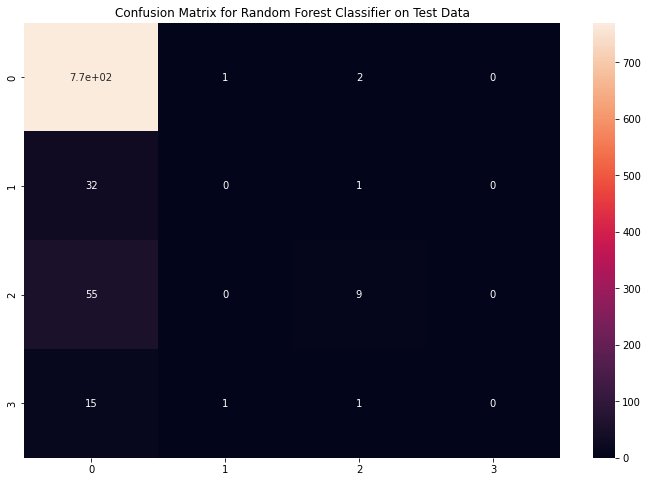

In [ ]:

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=100,n_estimators=53,max_features=7)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [ ]:
labels = df.columns
labels

Index(['submission_id', 'gender', 'age', 'geography', 'financial_situation',
       'education', 'employment_status', 'submission_state',
       'can_children_observe_deterioration_of_basic_services_of_school',
       'are_there_children_0_to_2_yrs_out_of_educational_system',
       'were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school',
       'are_there_teachers_at_scheduled_class_hours',
       'are_there_children_who_stopped_enrolling_in_primary_education',
       'are_there_children_who_stopped_enrolling_in_secondary_education',
       'are_children_attending_face_to_face_classes',
       'are_children_3_to_17_yrs_dealing_with_irregular_school_activity',
       'are_children_being_teached_by_unqualified_people',
       'did_teachers_leave_the_educational_system',
       'do_school_and_the_teachers_have_internet_connection',
       'do_children_have_internet_connection',
       'do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity',
       'does_home_sho

In [ ]:
rf_model.feature_importances_
#plt.barh(labels, rf_model.feature_importances_)

array([0.14579608, 0.03038923, 0.04581   , 0.0423478 , 0.06700877,
       0.05844465, 0.06250611, 0.09213864, 0.02038549, 0.02827582,
       0.02701107, 0.04258078, 0.03234147, 0.02122117, 0.02854272,
       0.03456374, 0.02649215, 0.02323435, 0.02451676, 0.02714481,
       0.02212713, 0.02316645, 0.02498248, 0.0252662 , 0.02370611])

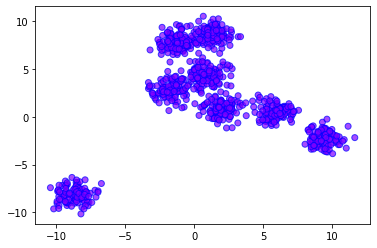

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
 
# Generating 600 samples using make_blobs
df, clusters = make_blobs(n_samples = 887, centers = 8, cluster_std = 0.75, random_state = 0)
 
# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
 
# Fit the data (Training)
model.fit(df)
 
# Predict the same data
pred = model.predict(df)
 
# Creating a scatter plot
plt.scatter(df[:887, 0], df[:887, 1], c = preds, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()